<a href="https://colab.research.google.com/github/Qvery-mm/NumericMethods_2/blob/main/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вычислительный практикум
# Задание №4
### Задача Коши для обыкновенного дифференциального уравнения 1-го порядка.
## Ковальчуков Александр
### 321 группа
### Вариант №6

$y' = 1 + (0.5 - x)  \sin y - (1 + x) y$

$y(0) = 0$

In [360]:
from math import sin
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.rcParams['figure.dpi'] = 150

def dy(y, x):
  return 1 + (0.5 - x) * sin(y) - (1 + x) * y

def ddy(x):
  return dy(x[1], x[0]) 


y0 = 0 

# Решение при помощи встроенных средств



In [361]:
a, b = 0, 1
h = 0.1
n = int((b - a) / h) + 1
x = np.arange(a, b + h, h)
y = odeint(dy, y0, x) 
y = np.array(y).reshape(n, )
d_y = list(map(ddy, zip(x, y)))
y_math = pd.DataFrame({"x" : x, "y" : y, "y'" : d_y})
y_math

,x,y,y'
0,0.0,0.000000,1.000000
1,0.1,0.096896,0.932112
2,0.2,0.185374,0.832846
3,0.3,0.262692,0.710436
4,0.4,0.327004,0.574315
5,0.5,0.377413,0.433881
6,0.6,0.413918,0.297512
7,0.7,0.437277,0.171934
8,0.8,0.448826,0.061941
9,0.9,0.450281,-0.029622


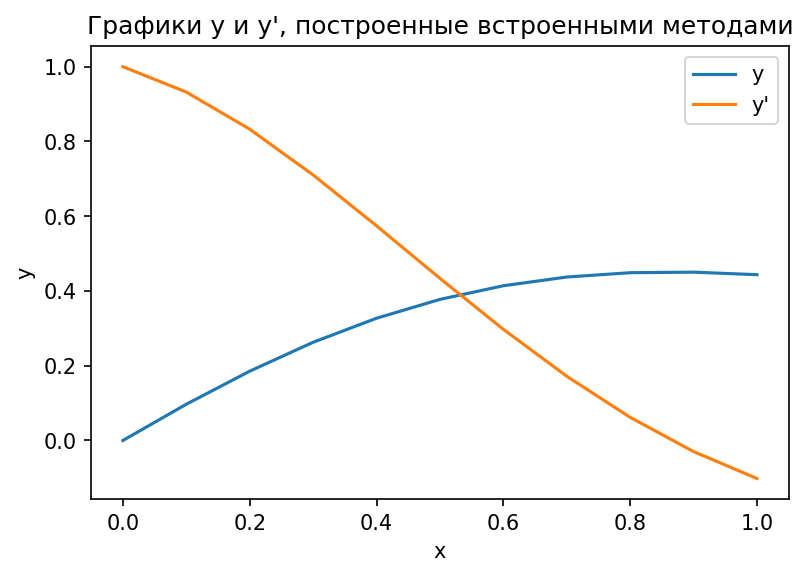

In [362]:
plt.plot(x, y, label="y")
plt.plot(x, d_y, label="y'")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Графики y и y', построенные встроенными методами")
plt.show()

# Решение методом Эйлера с шагом $h$

In [363]:
def euler(h):

  x_h = [0]
  y_h = [y0]
  y = y0
  n = int((b - a) / h) + 1
  for i in range(1, n):
    x = a + h * i
    y = y + h * dy(y, x)
    x_h.append(x)
    y_h.append(y)

  return pd.DataFrame({'x': x_h, 'y': y_h})

y_h = euler(h)
y_h

,x,y
0,0.0,0.000000
1,0.1,0.100000
2,0.2,0.190995
3,0.3,0.269962
4,0.4,0.334835
5,0.5,0.384609
6,0.6,0.419320
7,0.7,0.439893
8,0.8,0.447937
9,0.9,0.445505


# Решение методом Эйлера с шагом $\frac{h}{2}$

In [364]:
y_h2 = euler(h/2)
y_h2

,x,y
0,0.00,0.000000
1,0.05,0.050000
2,0.10,0.098250
3,0.15,0.144317
4,0.20,0.187815
5,0.25,0.228411
6,0.30,0.265828
7,0.35,0.299855
8,0.40,0.330342
9,0.45,0.357203


In [365]:
R_m = (np.array(y_h2['y'][::2]) - np.array(y_h['y'])) / (2**1 - 1)
y_rev = np.array(y_h2['y'][::2]) + R_m
y_rev = pd.DataFrame({'x': y_h['x'], 'y' : y_rev})
y_rev

,x,y
0,0.0,0.000000
1,0.1,0.096499
2,0.2,0.184635
3,0.3,0.261694
4,0.4,0.325850
5,0.5,0.376217
6,0.6,0.412791
7,0.7,0.436314
8,0.8,0.448093
9,0.9,0.449810


# Сравнительная таблица

In [366]:
pd.DataFrame({'x': y_math['x'],
              'y_math': y_math['y'],
              'y_h': y_h['y'],
              'y_h2': np.array(y_h2['y'][::2]),
              'y_rev': y_rev['y'],
              'y_rev - y_math': y_rev['y'] - y_math['y']})

,x,y_math,y_h,y_h2,y_rev,y_rev - y_math
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.1,0.096896,0.100000,0.098250,0.096499,-0.000397
2,0.2,0.185374,0.190995,0.187815,0.184635,-0.000739
3,0.3,0.262692,0.269962,0.265828,0.261694,-0.000998
4,0.4,0.327004,0.334835,0.330342,0.325850,-0.001154
5,0.5,0.377413,0.384609,0.380413,0.376217,-0.001196
6,0.6,0.413918,0.419320,0.416055,0.412791,-0.001127
7,0.7,0.437277,0.439893,0.438103,0.436314,-0.000963
8,0.8,0.448826,0.447937,0.448015,0.448093,-0.000733
9,0.9,0.450281,0.445505,0.447657,0.449810,-0.000471


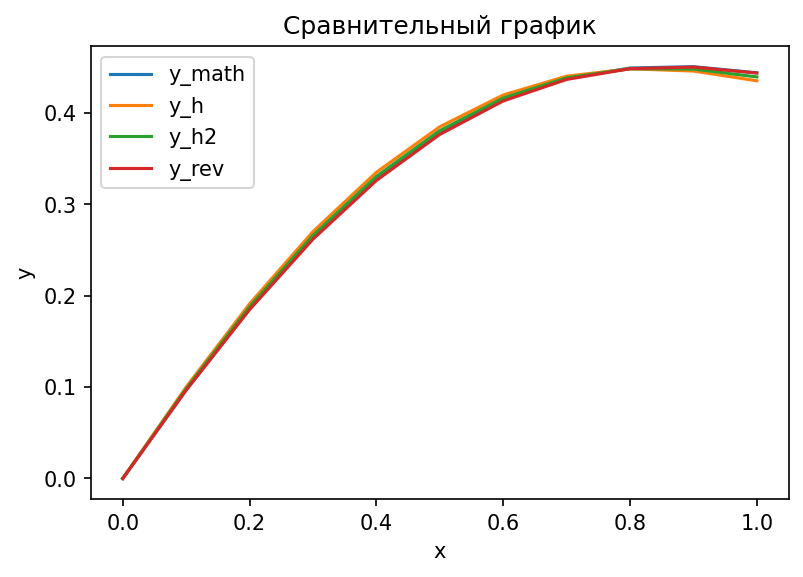

In [367]:
x = y_math['x']
plt.plot(x, y_math['y'], label="y_math")
plt.plot(x, y_h['y'], label="y_h")
plt.plot(x, np.array(y_h2['y'][::2]), label="y_h2")
plt.plot(x, y_rev['y'], label="y_rev")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Сравнительный график")
plt.show()

# Метод Рунге-Кутты четвертого порядка

In [368]:
x_h = [0]
y_h = [y0]
y = y0
x = a
h = 0.1
n = int((b - a) / h) + 1
for i in range(1, n):
  k1 = h * dy(y, x)
  k2 = h * dy(y + k1/2, x + h/2)
  k3 = h * dy(y + k2/2, x + h/2)
  k4 = h * dy(y + k3, x + h)
  x += h
  y += 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)
  x_h.append(x)
  y_h.append(y)

y_RK = pd.DataFrame({'x': x_h, 'y': y_h})
y_RK

,x,y
0,0.0,0.000000
1,0.1,0.096896
2,0.2,0.185373
3,0.3,0.262691
4,0.4,0.327003
5,0.5,0.377411
6,0.6,0.413915
7,0.7,0.437274
8,0.8,0.448823
9,0.9,0.450278


# Экстраполяционный метод Адамса 4-го порядка

In [369]:
# начало таблицы возьмем из метода Рунге-Кутты
y_Ad_ex = y_RK.copy()
y = y_Ad_ex['y'][4]
for i in range(4, n):
  y = y + 1 / 720 * h * ( 1901 * dy(y_Ad_ex['y'][i], y_Ad_ex['x'][i])
                        - 2774 * dy(y_Ad_ex['y'][i-1], y_Ad_ex['x'][i-1])
                        + 2616 * dy(y_Ad_ex['y'][i-2], y_Ad_ex['x'][i-2])
                        - 1274 * dy(y_Ad_ex['y'][i-3], y_Ad_ex['x'][i-3])
                        + 251  * dy(y_Ad_ex['y'][i-4], y_Ad_ex['x'][i-4]))
  y_Ad_ex['y'][i + 1] = y

y_Ad_ex

,x,y
0,0.0,0.000000
1,0.1,0.096896
2,0.2,0.185373
3,0.3,0.262691
4,0.4,0.327003
5,0.5,0.377452
6,0.6,0.413974
7,0.7,0.437353
8,0.8,0.448889
9,0.9,0.450342


# Итерполяционный метод Адамса 4-го порядка

In [370]:
# начало таблицы возьмем из метода Рунге-Кутты
y_Ad_in = y_Ad_ex.copy()
y = y_Ad_ex['y'][3]
for i in range(3, n-1):
  y = y + 1 / 720 * h * ( 251 * dy(y_Ad_in['y'][i + 1], y_Ad_in['x'][i + 1])
                        + 646 * dy(y_Ad_in['y'][i], y_Ad_in['x'][i])
                        - 264 * dy(y_Ad_in['y'][i-1], y_Ad_in['x'][i-1])
                        + 106 * dy(y_Ad_in['y'][i-2], y_Ad_in['x'][i-2])
                        - 19  * dy(y_Ad_in['y'][i-3], y_Ad_in['x'][i-3]))
  y_Ad_in['y'][i + 1] = y

y_Ad_in

,x,y
0,0.0,0.000000
1,0.1,0.096896
2,0.2,0.185373
3,0.3,0.262691
4,0.4,0.327001
5,0.5,0.377406
6,0.6,0.413907
7,0.7,0.437262
8,0.8,0.448808
9,0.9,0.450262


# Сравнительная таблица

In [371]:
pd.DataFrame({'x': y_math['x'],
              'y_math': y_math['y'],
              'y_math - y_RK': y_math['y'] - y_RK['y'],
              'y_math - y_Ad_ex': y_math['y'] - y_Ad_ex['y'],
              'y_math - y_Ad_in': y_math['y'] - y_Ad_in['y'],
              })

,x,y_math,y_math - y_RK,y_math - y_Ad_ex,y_math - y_Ad_in
0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.1,0.096896,2.375382e-07,2.375382e-07,2.375382e-07
2,0.2,0.185374,5.150339e-07,5.150339e-07,5.150339e-07
3,0.3,0.262692,8.670352e-07,8.670352e-07,8.670352e-07
4,0.4,0.327004,1.306967e-06,1.306967e-06,3.109138e-06
5,0.5,0.377413,1.824140e-06,-3.965592e-05,6.860738e-06
6,0.6,0.413918,2.383073e-06,-5.670118e-05,1.076766e-05
7,0.7,0.437277,2.942720e-06,-7.608107e-05,1.511029e-05
8,0.8,0.448826,3.451353e-06,-6.307517e-05,1.776274e-05
9,0.9,0.450281,3.839229e-06,-6.013865e-05,1.974719e-05
